<a href="https://colab.research.google.com/github/sukhijapiyush/Logistic-Regression-Project/blob/master/Breast%20Cancer%20Classification%20LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Breast Cancer Classification using Logistic Regression

### Problem Statement

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous).

### Objective

Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.

### Dataset Details

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

### Steps involved

- Data Load and Analysis
- Data Wragling
- Exploratory Data Analysis
- Splitting the dataset
- Scaling of the variables
- Modelling
- Hyperparameter Tuning
- Model Evaluation


### Importing Libraries


In [52]:
# Loading Libraries
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Feature Selection
from sklearn.feature_selection import RFE

# Model Creation
from sklearn.linear_model import LogisticRegression

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve,PrecisionRecallDisplay,f1_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Data Loading and information


In [29]:
# Loading Data
b_cancer_data = pd.read_csv('breast-cancer.csv')
# First 5 rows of the data
b_cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.set_style("whitegrid", {'axes.grid': False})
sns.set()


In [31]:
# Basic information about the data
# Number of rows and columns
print('Number of Columns:', b_cancer_data.shape[1])
print('Number of Rows:', b_cancer_data.shape[0])
# Number of missing values
print('Number of missing values:', b_cancer_data.isnull().sum().sum())
# Number of unique values
print('Number of unique values:', b_cancer_data.nunique().sum())
# Number of duplicates
print('Number of duplicates:', b_cancer_data.duplicated().sum())


Number of Columns: 32
Number of Rows: 569
Number of missing values: 0
Number of unique values: 15911
Number of duplicates: 0


In [32]:
# Basic information about the dataframe
b_cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
# Describing the dataframe
b_cancer_data.describe([0.25, 0.50, 0.75, 0.95, 0.99])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
95%,9.042446e+07,20.576000,27.150000,135.820000,1309.800000,0.118780,0.208700,0.243020,0.125740,0.230720,0.076090,0.959520,2.212000,7.041600,115.800000,0.012644,0.060578,0.078936,0.022884,0.034988,0.007960,25.640000,36.300000,171.640000,2009.600000,0.171840,0.564120,0.682380,0.236920,0.406160,0.119520
99%,9.010343e+08,24.371600,30.652000,165.724000,1786.600000,0.132888,0.277192,0.351688,0.164208,0.259564,0.085438,1.291320,2.915440,9.690040,177.684000,0.017258,0.089872,0.122292,0.031194,0.052208,0.012650,30.762800,41.802400,208.304000,2918.160000,0.188908,0.778644,0.902380,0.269216,0.486908,0.140628
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
# Columns in the dataframe
print(b_cancer_data.columns)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


As there are no null values present, no cleaing of data required.


### Data Cleaning


In [35]:
# Removing the ID column as it is a duplicate index
b_cancer_data = b_cancer_data.drop('id', axis=1)
# Printing dataframe
b_cancer_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
num_cols = b_cancer_data.drop('diagnosis', axis=1)
target_cols = b_cancer_data['diagnosis']


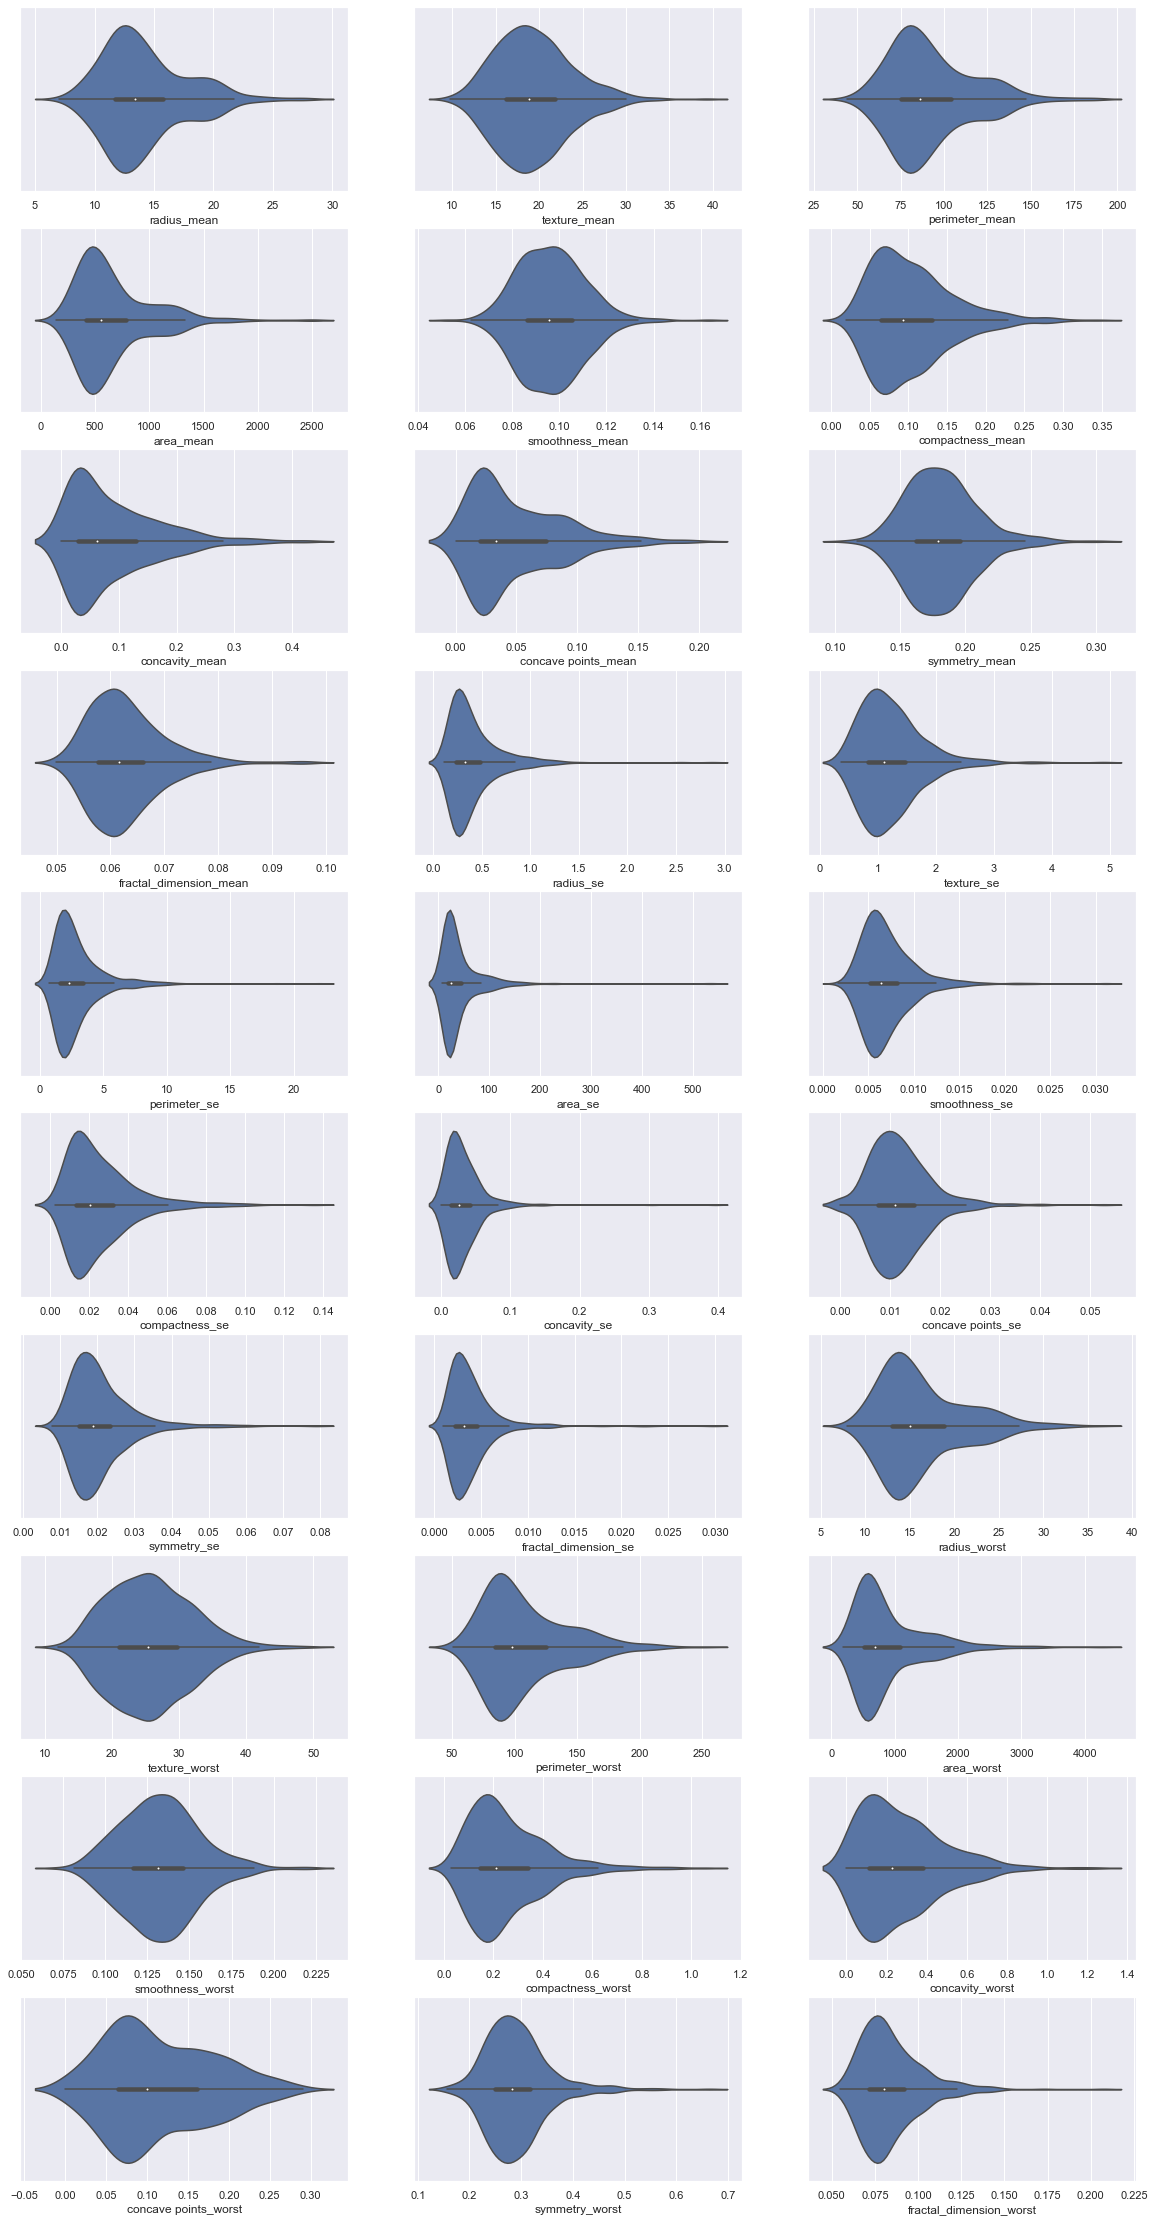

In [37]:
# Checking for outlier analysis
k = 0
fig, axes = plt.subplots(10, 3, figsize=(20, 40), sharey=True)
for i in range(0, 10):
    for j in range(0, 3):
        sns.violinplot(ax=axes[i, j], x=b_cancer_data[num_cols.columns[k]])
        k = k+1
plt.show()


In [38]:
# Removing Quartile via IQR method
Q1 = b_cancer_data.quantile(0.05)
Q3 = b_cancer_data.quantile(0.95)
IQR = Q3 - Q1
b_cancer_data = b_cancer_data[~((b_cancer_data < (
    Q1 - 1.5 * IQR)) | (b_cancer_data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [39]:
# Shape of dataset
b_cancer_data.shape


(558, 31)

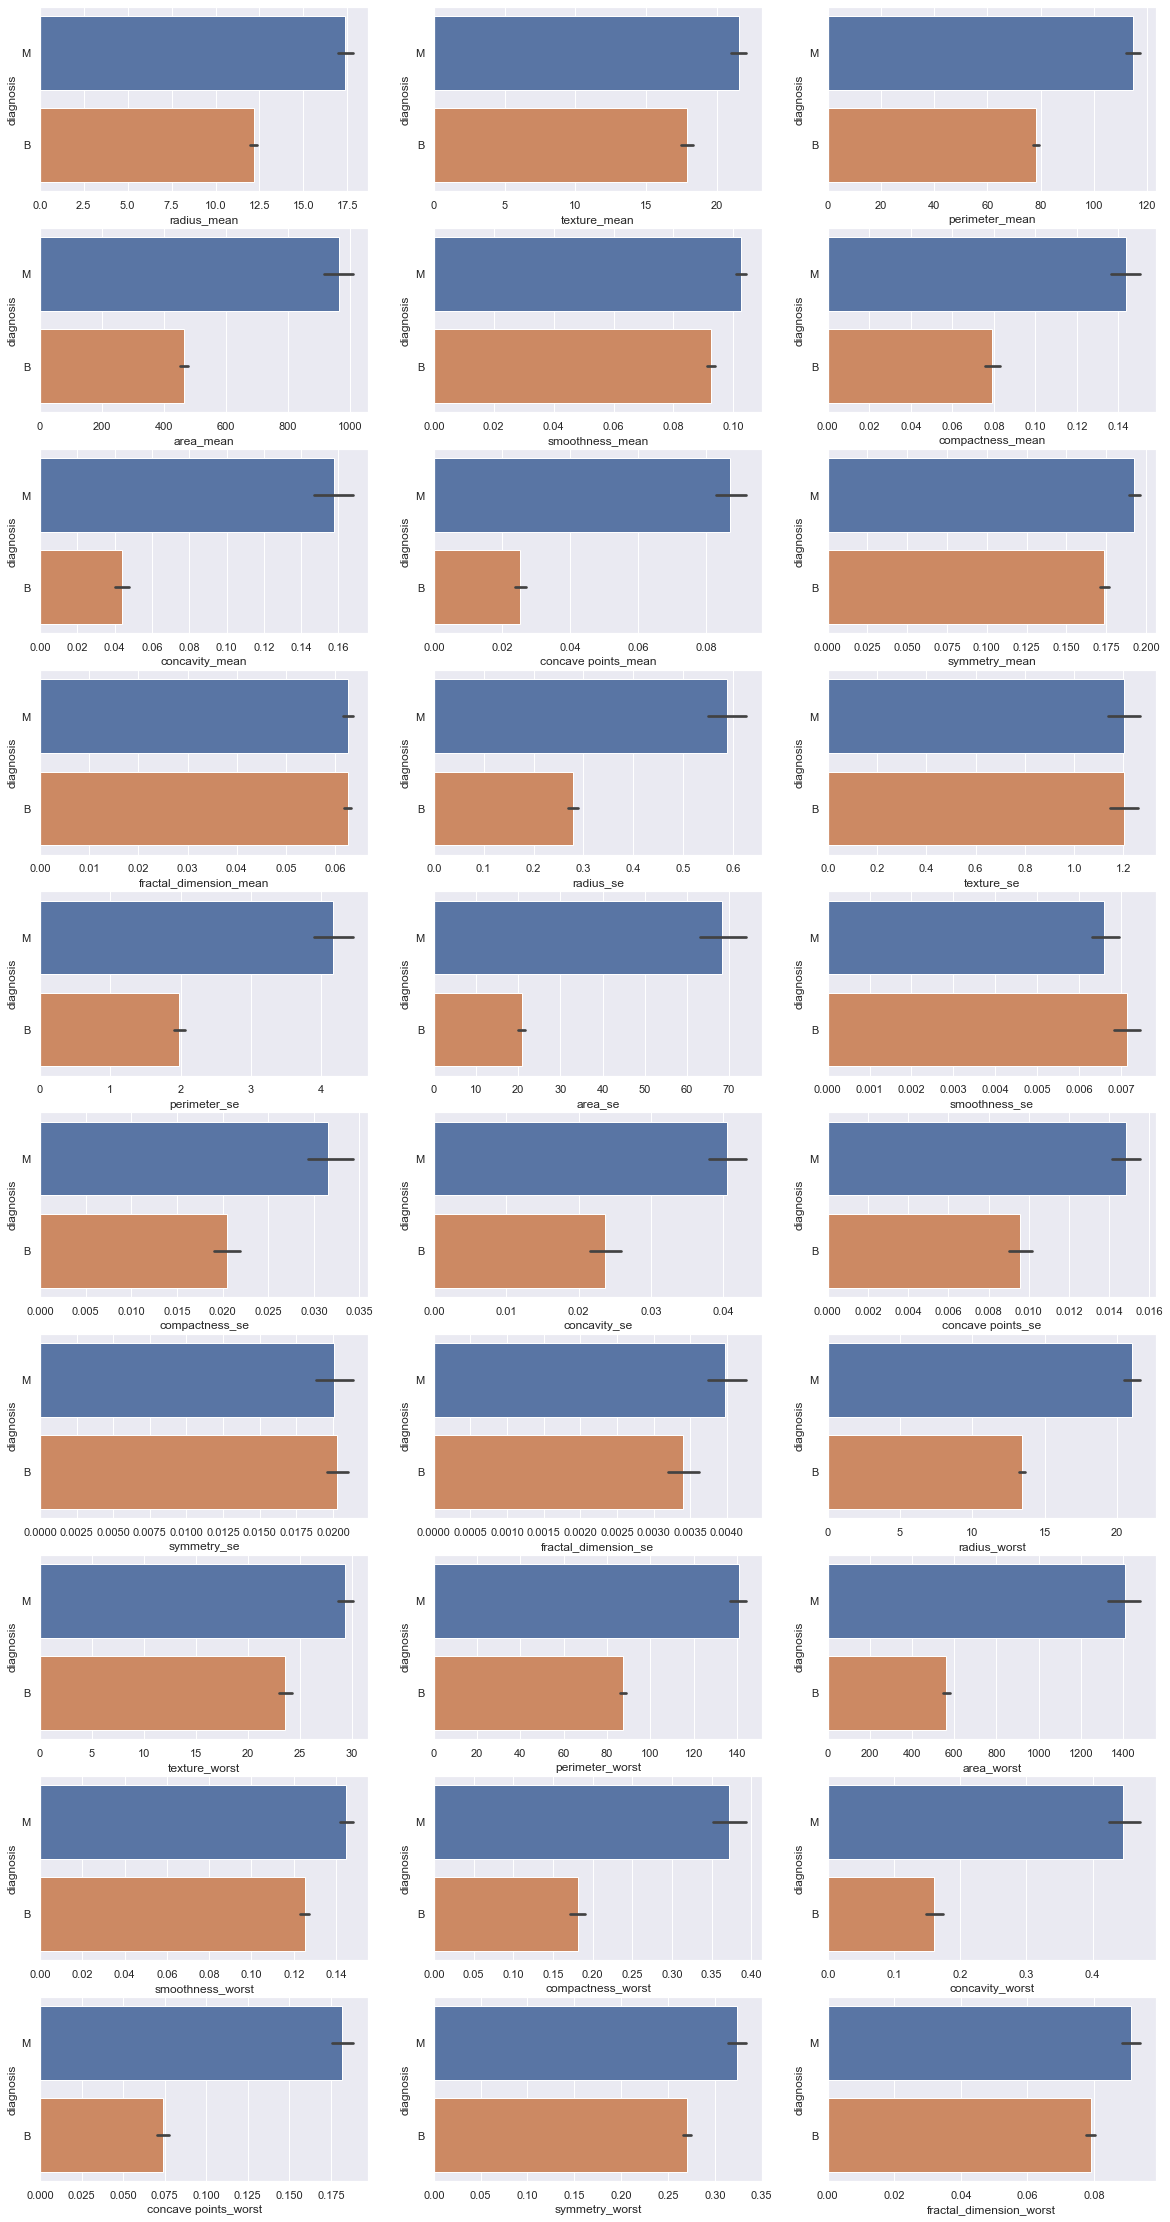

In [40]:
# Checking for outlier analysis
k = 0
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
for i in range(0, 10):
    for j in range(0, 3):
        sns.barplot(
            ax=axes[i, j], x=b_cancer_data[num_cols.columns[k]], y=b_cancer_data['diagnosis'])
        k = k+1
plt.show()


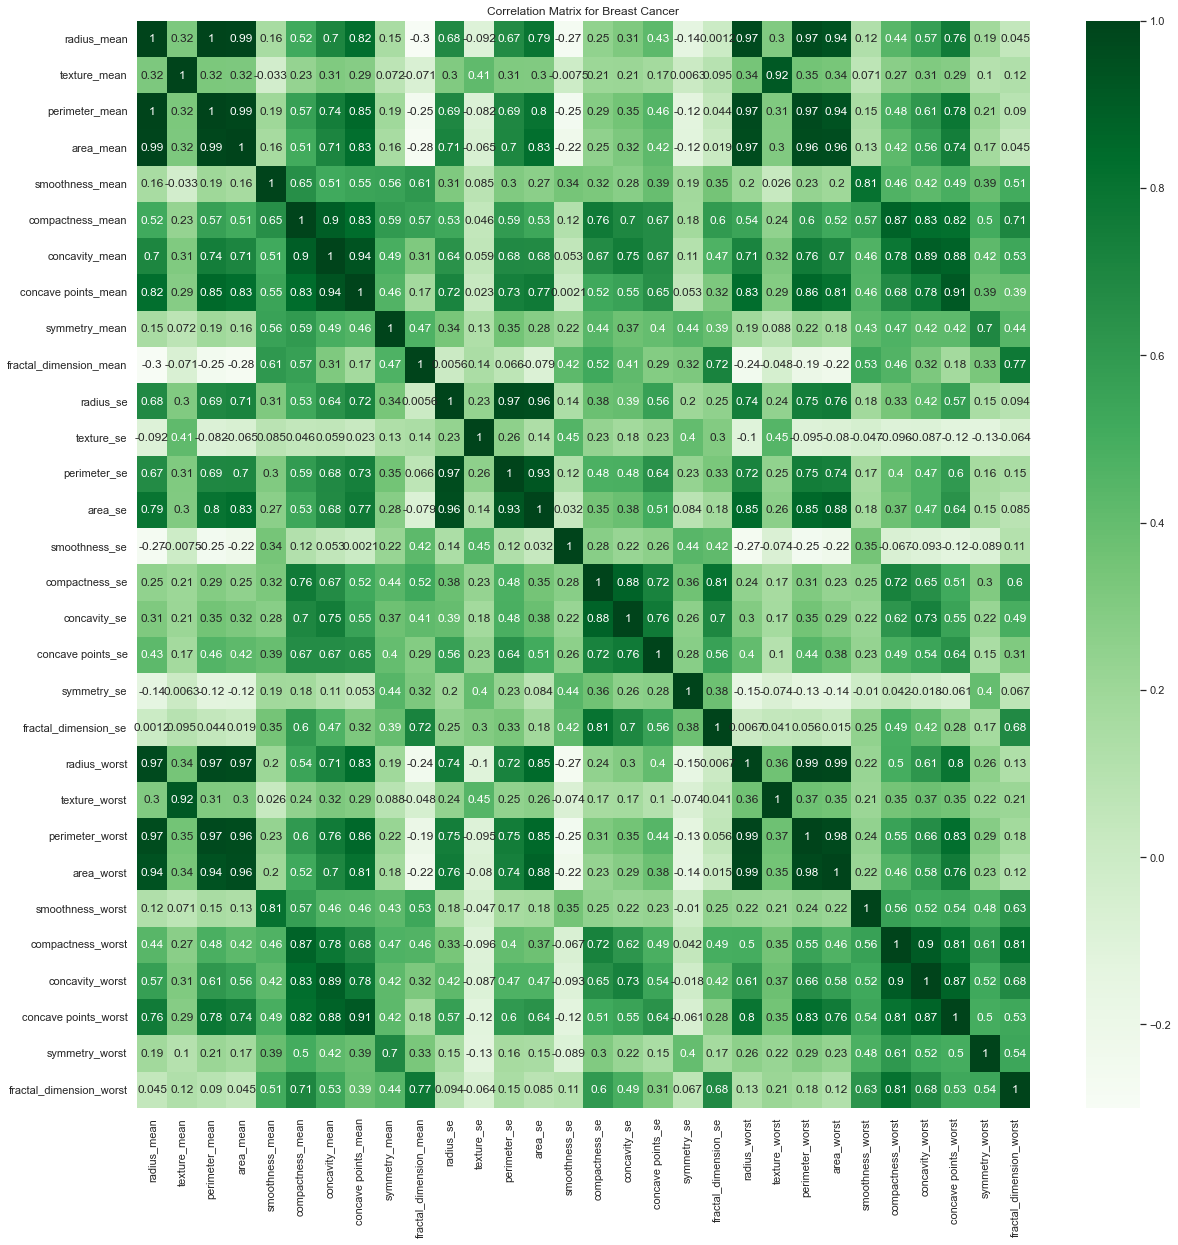

In [41]:
# Checking correlation
plt.figure(figsize=(20, 20))
sns.heatmap(b_cancer_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix for Breast Cancer')
plt.show()


### Feature selection using GridSearchCV


In [42]:
# Diving Dataset into test and train
df_train, df_test = train_test_split(
    b_cancer_data, train_size=0.7, random_state=42, shuffle=True)


In [43]:
y_train = df_train.pop('diagnosis')
X_train = df_train
y_test = df_test.pop('diagnosis')
X_test = df_test
# Scaling the dataset
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(
    X_train[num_cols.columns]), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(
    X_test[num_cols.columns]), columns=X_train.columns)
# Mapping output to binary
target_map = {'M': 1, 'B': 0}
y_train = y_train.apply(lambda x: target_map[x])
y_test = y_test.apply(lambda x: target_map[x])
print(X_train.shape, X_test.shape, y_train.shape, y_train.shape)


(390, 30) (168, 30) (390,) (390,)


In [44]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits=10, shuffle=True, random_state=42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 31))}]


# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator=rfe,
                        param_grid=hyper_params,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)
model_cv.best_params_


Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'n_features_to_select': 24}

Making model with optimized number of features to sort the columns which are important for predictions.


In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=29)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [46]:
# Getting best columns in a dataframe
col = X_train.columns[rfe.support_]
X_train = X_train[col]
X_test = X_test[col]


In [47]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                 'C': [0.1, 0.5, 1, 5, 10, 50, 100], 'class_weight':[None, 'balanced'],
                'random_state':list(range(0,101)),'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression(max_iter=1000,n_jobs=-1)
lm.fit(X_train, y_train)
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator=lm,
                        param_grid=hyper_params,
                        scoring='precision',
                        cv=folds,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28280 candidates, totalling 141400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10, 50, 100],
                          'class_weight': [None, 'balanced'],
                          'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                          'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='precision', verbose=1)

In [48]:
y_test_pred=model_cv.best_estimator_.predict(X_test)
y_test_pred_prob=model_cv.best_estimator_.predict_proba(X_test)

### Model Metrics
As the priority is precision i.e. to identify the Cancer cells  correctly while having high recall.

In [53]:
# Model Metrics for test
print('Accuracy Score', accuracy_score(y_test,y_test_pred))
print('Precision Score', precision_score(y_test,y_test_pred))
print('Recall Score', recall_score(y_test,y_test_pred))
print('F1 Score', f1_score(y_test,y_test_pred))

Accuracy Score 0.9702380952380952
Precision Score 1.0
Recall Score 0.9264705882352942
F1 Score 0.9618320610687023


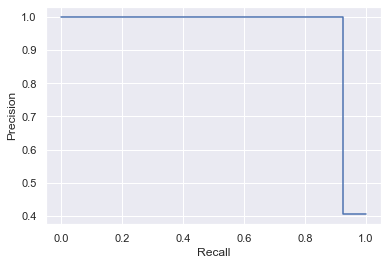

In [50]:
# Precision Recall Curve
precision,recall,thresholds=precision_recall_curve(y_test,y_test_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

We have achieved a precision of **1** which is most optimal result for our scenerio and we also have 97% accuracy on test as well 96% F1 score we can conclude the threshold tuning is not required.